## Observations and Insights 

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

mouse_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [86]:
# Checking the number of mice.
mouse_data["Mouse ID"].nunique()

249

In [87]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data["Mouse ID"][mouse_data.duplicated(["Mouse ID", "Timepoint"])]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [88]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data[mouse_data.duplicated(["Mouse ID", "Timepoint"])]





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [89]:
#create a variable to hold rows that need deleting 
drop_dups = mouse_data[mouse_data.duplicated(["Mouse ID", "Timepoint"])].index
# delete duplicate rows
clean = mouse_data.drop(mouse_data.index[drop_dups])



In [90]:
# Checking the number of mice in the clean DataFrame.
clean["Mouse ID"].nunique()

249

## Summary Statistics

In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_reg = clean.groupby(["Drug Regimen"])

drug_mean = round(drug_reg["Tumor Volume (mm3)"].mean(), 2)
drug_median = round(drug_reg["Tumor Volume (mm3)"].median(), 2)
drug_standev = round(drug_reg["Tumor Volume (mm3)"].std(), 2)
drug_var = round(drug_reg["Tumor Volume (mm3)"].var(), 2)
drug_sem = round(drug_reg["Tumor Volume (mm3)"].sem(), 2)

summary_stats_tumor_vol = pd.DataFrame({"Mean":drug_mean, "Median": drug_median, "Variance": drug_var, "Standard Deviation": drug_standev, "SEM": drug_sem})
summary_stats_tumor_vol




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

(-0.75, 9.75)

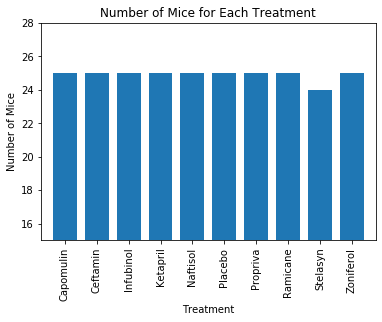

In [108]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_count_drug = drug_reg["Mouse ID"].nunique()


mice_plot = mice_count_drug.plot(kind = "bar", title = 'Number of Mice for Each Treatment', width = .75)
mice_plot.set_xlabel("Treatment")
mice_plot.set_ylabel("Number of Mice")
mice_plot.set_ylim(15, 28)
mice_plot.set_xlim(-0.75, len(mice_count_drug)-0.25)



Text(0, 0.5, 'Number of Mice')

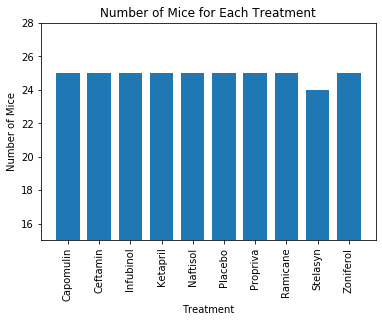

In [107]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mouse_count = drug_reg["Mouse ID"].nunique()
x_axis = np.arange(len(summary_stats_tumor_vol))
plt.bar(x_axis, mouse_count, width = .75)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation = 'vertical')
     
plt.ylim(15, max(mouse_count)+3)
plt.title("Number of Mice for Each Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")

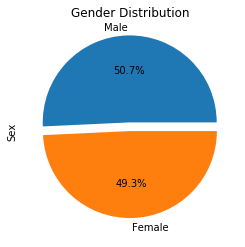

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean["Sex"].value_counts()
gender.plot(kind = "pie", title = "Gender Distribution", autopct="%1.1f%%", explode = (0.1, 0))
gender.plot()

Text(0.5, 1.0, 'Gender Distribution')

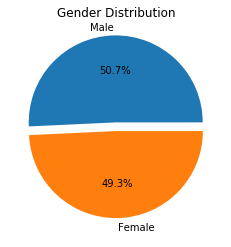

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = clean["Sex"].value_counts()
labels = "Male", "Female"
plt.pie(gender, labels = labels, autopct="%1.1f%%", explode = (0.1, 0))
plt.title("Gender Distribution")


## Quartiles, Outliers and Boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_drugs = clean.set_index("Drug Regimen")
clean_four_drugs = four_drugs.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], :]
clean_four_drugs = clean_four_drugs.reset_index()
  

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_vol = clean_four_drugs.groupby(["Mouse ID"])
max_vol = max_vol["Timepoint"].max()
max_vol = max_vol.reset_index()

last_volume =  max_vol.merge(clean_four_drugs, on = ["Mouse ID", "Timepoint"], how = "left")

last_volume




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [98]:
def drug_quartiles(drug, list_):
    tumor_volume= last_volume.loc[last_volume["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    list_.append(tumor_volume)
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"**************{drug}**************************")
    print(f"The lower quartile of tumor vol is: {lowerq}")
    print(f"The upper quartile of tumor vol is: {upperq}")
    print(f"The interquartile range of tumor vol is: {iqr}")
    print(f"The the median of tumor vol is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

In [99]:
# Put treatments into a list for for loop (and later for plot labels)
trtment=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_vol = []


for row in trtment:
    drug_quartiles(row, final_tumor_vol)

# Create empty list to fill with tumor vol data (for plotting)
fin_tumor = []

fin_tumor = last_volume["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

**************Capomulin**************************
The lower quartile of tumor vol is: 32.37735684
The upper quartile of tumor vol is: 40.1592203
The interquartile range of tumor vol is: 7.781863460000004
The the median of tumor vol is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
**************Ramicane**************************
The lower quartile of tumor vol is: 31.56046955
The upper quartile of tumor vol is: 40.65900627
The interquartile range of tumor vol is: 9.098536719999998
The the median of tumor vol is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
**************Infubinol**************************
The lower quartile of tumor vol is: 54.04860769
The upper quartile of tumor vol is: 65.52574285
The interquartile range of tumor vol is: 11.477135160000003
The the median of tumor vol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Value

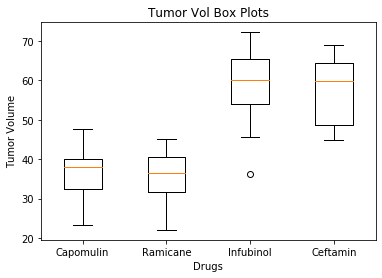

In [100]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Vol Box Plots')
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel("Drugs")
ax1.set_xticklabels(trtment)
ax1.boxplot(final_tumor_vol)
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Time Point')

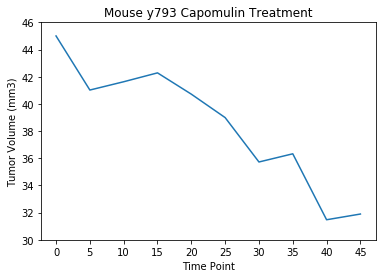

In [101]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s_mouse =clean.set_index(["Mouse ID"])
spec_mouse = s_mouse.loc["y793"]
x_axis = spec_mouse.iloc[:,4]
y_axis = spec_mouse.iloc[:,5]
plt.plot(x_axis, y_axis)
plt.xticks(x_axis)
plt.ylim(30, 46)
plt.title("Mouse y793 Capomulin Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time Point")


(14, 26)

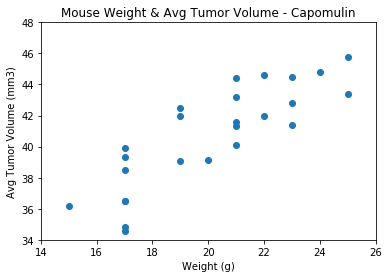

In [102]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight_vol = clean_four_drugs.set_index("Drug Regimen")
weight_volu = weight_vol.loc["Capomulin"]
weight_volu.reset_index()
weight_volume = weight_volu.groupby("Mouse ID")

tumor_avg = weight_volume["Tumor Volume (mm3)"].mean()
weight = weight_volume["Weight (g)"].mean()

plt.scatter(weight, tumor_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Mouse Weight & Avg Tumor Volume - Capomulin")
plt.ylim(34, 48)
plt.xlim(14, 26)

## Correlation and Regression

the correlation coefficient is 0.84


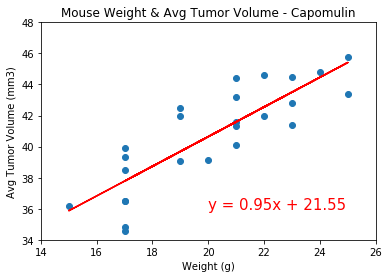

In [103]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, tumor_avg)
print(f'the correlation coefficient is {round(correlation[0],2)}')

x_values = weight
y_values = tumor_avg
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Mouse Weight & Avg Tumor Volume - Capomulin")
plt.ylim(34, 48)
plt.xlim(14, 26)
plt.show()
